# Load raw Ben-Ge Dataset #

In [1]:
import yaml
from lit_diffusion.util import instantiate_python_class_from_string_config

In [2]:
!ls ../../../remote-sensing-core/configs/ffcv_datasets/ben_ge_60_delta/fractions_multilabel

ffcv_ben-ge-train60-delta_10_percent.yaml
ffcv_ben-ge-train60-delta_1_percent.yaml
ffcv_ben-ge-train60-delta_50_percent.yaml


In [3]:
with open("../../../remote-sensing-core/configs/ffcv_datasets/ben_ge_60_delta/fractions_multilabel/ffcv_ben-ge-train60-delta_50_percent.yaml", "r") as config_file:
    yaml_config = yaml.safe_load(config_file)
dataset = instantiate_python_class_from_string_config(yaml_config["dataset_config"])

In [4]:
for x in dataset[1]:
    try:
        print(x.shape)
    except AttributeError:
        print(x)

()
()
(9,)
(1, 120, 120)
(3, 120, 120)
(11,)
(11,)
()
()
(2, 120, 120)
(12, 120, 120)
['climate_zone', 'elevation_difference_label', 'era_5', 'esa_worldcover', 'glo_30_dem', 'multiclass_numeric_label', 'multiclass_one_hot_label', 'season_s1', 'season_s2', 'sentinel_1', 'sentinel_2']


In [5]:
import seaborn as sns
import matplotlib as mpl


def set_matplotlib_style():
    # Theme
    sns.set_style("whitegrid")
    # Context
    sns.set_context("paper", font_scale=2)
    # Errorbars
    mpl.rcParams["errorbar.capsize"] = 5.0

    mpl.rcParams["legend.fontsize"] = "xx-small"  # using a named size
    mpl.rcParams["image.cmap"] = "viridis"
set_matplotlib_style()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


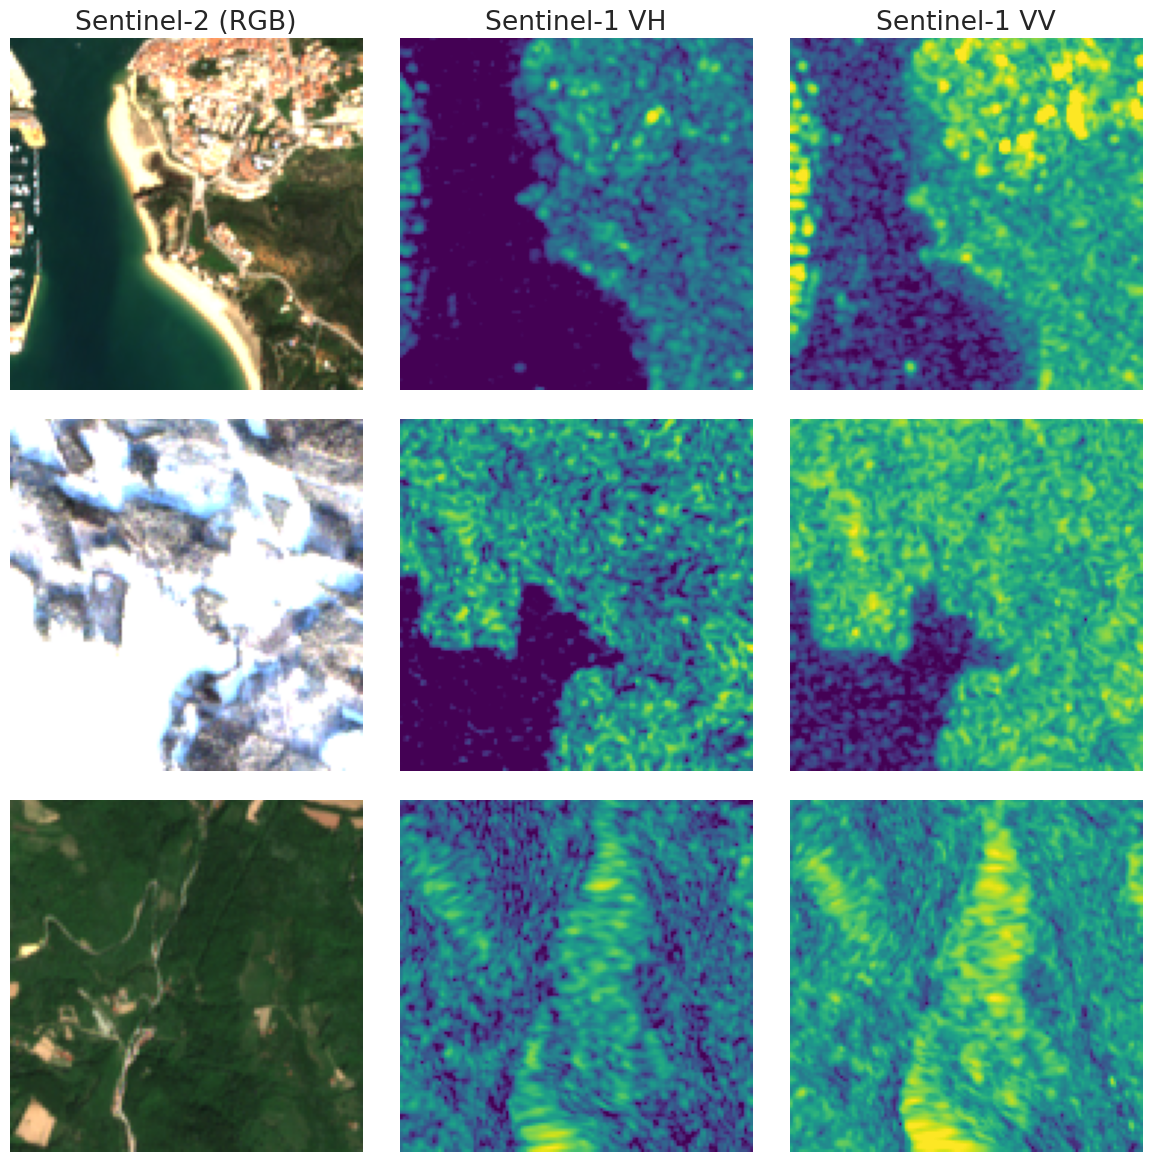

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,3, figsize=(12, 12))
nice_samples = [20020, 36252, 25900]
samples = [dataset[i] for i in nice_samples] 

first_row = 0
for ax_row, sample in zip(axs, samples):
    s2_img = sample[10]
    s2_img = s2_img[[3, 2, 1], :, :].transpose((1, 2, 0))
    s2_img = s2_img.clip(0, 10000) / 10000
    s2_img = s2_img * 4.5

    s1_img = sample[9]
    # VH
    s1_vh = s1_img[[0], :, :].transpose((1, 2, 0)).clip(-25, 0) / 25
    # VV
    s1_vv = s1_img[[1], :, :].transpose((1, 2, 0)).clip(-25, 0) / 25

    for ax, img, title in zip(ax_row, (s2_img, s1_vh, s1_vv), ("Sentinel-2 (RGB)", "Sentinel-1 VH", "Sentinel-1 VV")):
        if first_row < 3:
            ax.set_title(title)
            first_row += 1
        ax.imshow(img)
        ax.axis("off")
plt.tight_layout()
plt.savefig("./new-beng-ge-example-locations", dpi=150, bbox_inches="tight")

In [29]:
list(range(0, len(dataset), int(len(dataset)/9)))

[0, 5176, 10352, 15528, 20704, 25880, 31056, 36232, 41408]

In [ ]:
[0, 5176, 10352, 15528, 20705, 25880, 31056, 36232, 41408]